In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [17]:
df = sns.load_dataset('titanic')
df = df[['age','fare','survived']]

In [18]:
df

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [19]:
df.isnull().sum()

,0
age,177
fare,0
survived,0


In [20]:
df['age'].fillna(df['age'].mean(), inplace=True)

/tmp/ipython-input-1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [21]:
df.isnull().sum()

,0
age,0
fare,0
survived,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis=1), df['survived'], test_size=0.2, random_state=42)

/tmp/ipython-input-1777855429.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


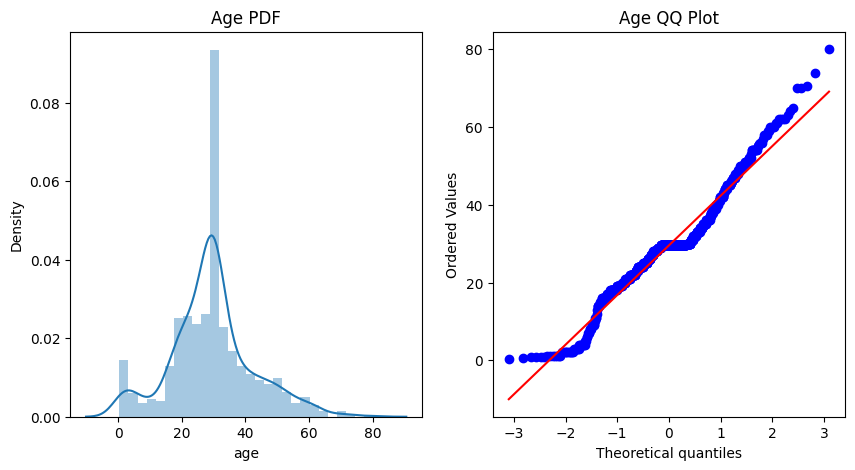

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(X_train['age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')
plt.show()

/tmp/ipython-input-3573547573.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

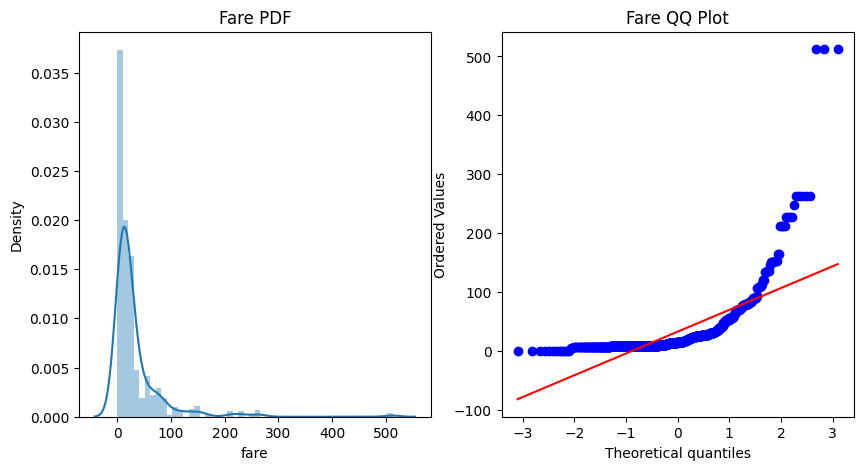

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(X_train['fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')
plt

In [27]:
trfn = FunctionTransformer(np.log1p)

In [28]:
X_train_trfn = trfn.fit_transform(X_train)
X_test_trfn = trfn.transform(X_test)

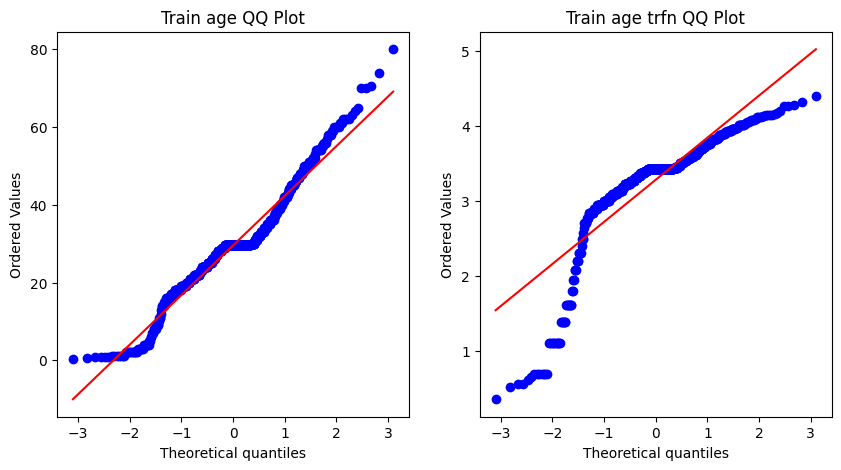

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(121)
stats.probplot(X_train['age'], dist='norm', plot=plt)
plt.title('Train age QQ Plot')
plt.subplot(122)
stats.probplot(X_train_trfn['age'], dist='norm', plot=plt)
plt.title('Train age trfn QQ Plot')
plt.show()

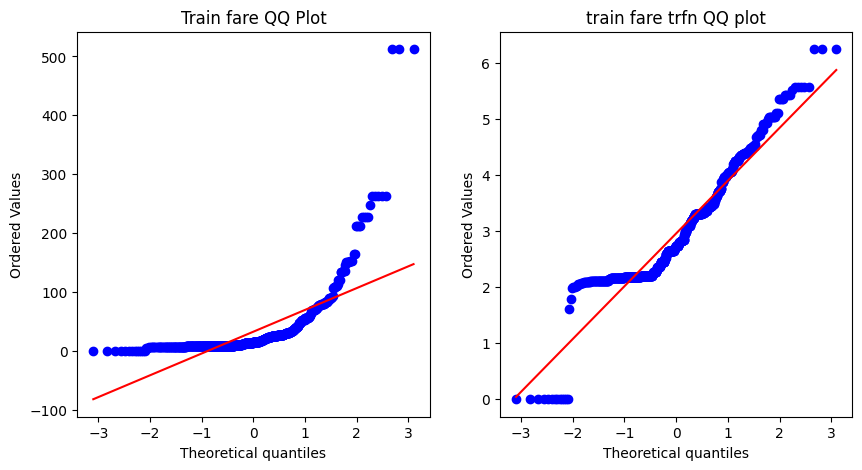

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(121)
stats.probplot(X_train['fare'], dist='norm', plot=plt)
plt.title('Train fare QQ Plot')
plt.subplot(122)
stats.probplot(X_train_trfn['fare'], dist='norm', plot = plt)
plt.title('train fare trfn QQ plot')
plt.show()

In [37]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['fare'])], remainder = 'passthrough')

In [38]:
X_train_trfn2 = trf2.fit_transform(X_train)
X_test_trfn2 = trf2.transform(X_test)

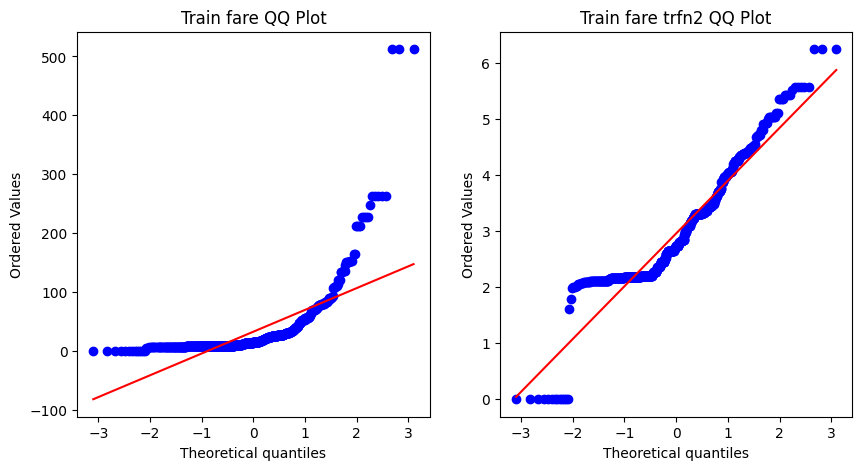

In [46]:
plt.figure(figsize= (10,5))
plt.subplot(121)
stats.probplot(X_train['fare'], dist='norm', plot=plt)
plt.title('Train fare QQ Plot')
plt.subplot(122)
stats.probplot(X_train_trfn2[:, 0], dist='norm', plot=plt)
plt.title('Train fare trfn2 QQ Plot')
plt.show()

In [47]:
df

,age,fare,survived
0,22.000000,7.2500,0
1,38.000000,71.2833,1
2,26.000000,7.9250,1
3,35.000000,53.1000,1
4,35.000000,8.0500,0
...,...,...,...
886,27.000000,13.0000,0
887,19.000000,30.0000,1
888,29.699118,23.4500,0
889,26.000000,30.0000,1


In [48]:
def apply_transform(transform):
  X= df.iloc[:,0:2]
  Y= df.iloc[:,2]
  trfn3= ColumnTransformer([('log', FunctionTransformer(transform), ['fare'])], remainder= 'passthrough')
  X_trfn3= trfn3.fit_transform(X)
  plt.figure(figsize= (10,5))
  plt.subplot(121)
  stats.probplot(X['fare'], dist='norm', plot=plt)
  plt.title('Train fare QQ Plot')
  plt.subplot(122)
  stats.probplot(X_trfn3[:,0], dist='norm', plot=plt)
  plt.title('Train fare trfn3 QQ Plot')
  plt.show()

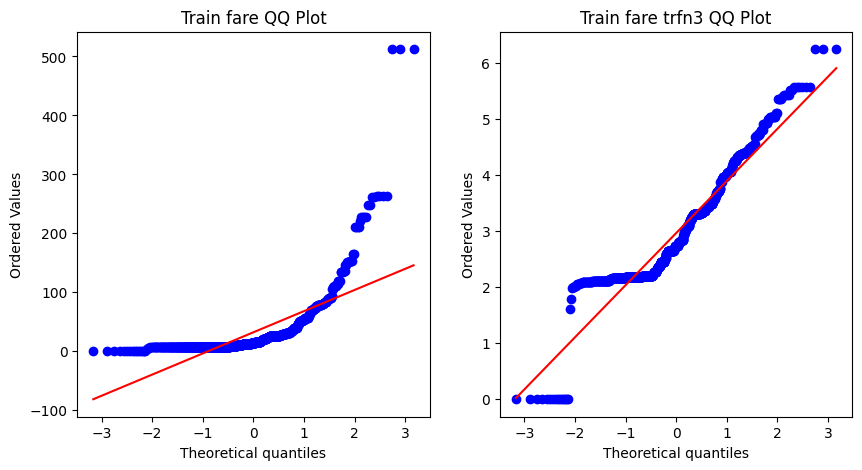

In [56]:
apply_transform(np.log1p)